# Text Data Analysis

1. Most common words - find these and create word clouds
2. Size of vocabulary - number of unique words and how quickly someone speaks
3. Amount of profanity - most common terms

## Most common words

In [1]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,mark
ability,5
able,16
absolute,1
absolutely,1
abstract,1


In [2]:
# Find the top 30 words
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'mark': [('people', 204),
  ('think', 187),
  ('thats', 84),
  ('lot', 71),
  ('just', 71),
  ('like', 63),
  ('world', 58),
  ('things', 48),
  ('right', 44),
  ('dont', 43),
  ('theres', 42),
  ('want', 40),
  ('really', 40),
  ('harari', 39),
  ('ai', 39),
  ('know', 38),
  ('zuckerberg', 38),
  ('better', 37),
  ('different', 36),
  ('youre', 34),
  ('countries', 34),
  ('mean', 33),
  ('im', 33),
  ('question', 33),
  ('technology', 33),
  ('maybe', 33),
  ('good', 31),
  ('actually', 31),
  ('way', 30),
  ('global', 30)]}

In [3]:
# Print the top 15 words
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

mark
people, think, thats, lot, just, like, world, things, right, dont, theres, want, really, harari
---


In [4]:

# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['people',
 'think',
 'thats',
 'lot',
 'just',
 'like',
 'world',
 'things',
 'right',
 'dont',
 'theres',
 'want',
 'really',
 'harari',
 'ai',
 'know',
 'zuckerberg',
 'better',
 'different',
 'youre',
 'countries',
 'mean',
 'im',
 'question',
 'technology',
 'maybe',
 'good',
 'actually',
 'way',
 'global']

In [6]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('people', 1),
 ('think', 1),
 ('thats', 1),
 ('lot', 1),
 ('just', 1),
 ('like', 1),
 ('world', 1),
 ('things', 1),
 ('right', 1),
 ('dont', 1),
 ('theres', 1),
 ('want', 1),
 ('really', 1),
 ('harari', 1),
 ('ai', 1),
 ('know', 1),
 ('zuckerberg', 1),
 ('better', 1),
 ('different', 1),
 ('youre', 1),
 ('countries', 1),
 ('mean', 1),
 ('im', 1),
 ('question', 1),
 ('technology', 1),
 ('maybe', 1),
 ('good', 1),
 ('actually', 1),
 ('way', 1),
 ('global', 1)]

In [8]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

[]

In [9]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [18]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

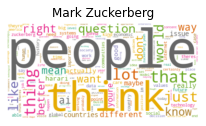

In [20]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Mark Zuckerberg']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

### According to the text analysis, Mark Zuckerberg said the word "people" and "think" a lot in this conversation.